# I'll train a model to tell birds from airplanes

First let s import the dataset

In [1]:
from torchvision import datasets
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [2]:
cifar10.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [3]:
img, label = cifar10[99]
img, label, cifar10.classes[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

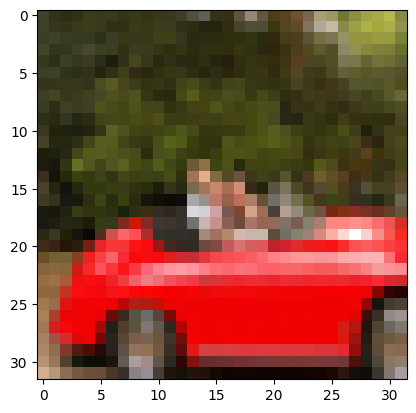

In [4]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [ ]:
from torchvision import transforms
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

Let's see how we can plot the image when it is in a Tensor form:

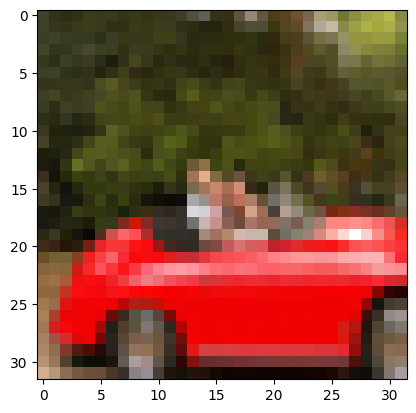

In [8]:
img_t, _ = tensor_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

### Normalising the Data

In [22]:
import torch
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
mean = imgs.view(3, -1).mean(dim=1)
std = imgs.view(3, -1).std(dim=1)

transformed_cifar10 = datasets.CIFAR10(
        data_path, train=True, download=False,
        transform=transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean,
                std)
        ]))
transformed_cifar10_test = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
)

Let's plot the normalised image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9802377..2.1267893].


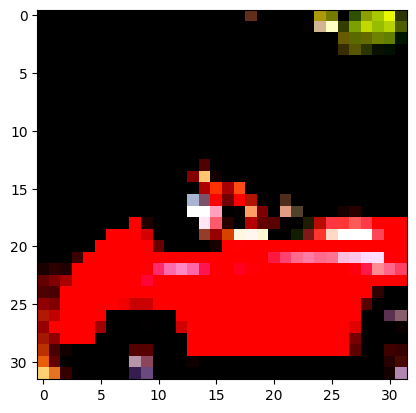

In [23]:
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

## Building the dataset

We'll only take the data we need from cifar10, aka the birds and airplanes

In [24]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in transformed_cifar10
    if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in transformed_cifar10_test
    if label in [0, 2]]

In [25]:
print(len(cifar2))

10000


In [ ]:
import torch.nn as nn

n_out = 2
model = nn.Sequential(
        nn.Linear(3072, 512),
        nn.Tanh(),    # Activation func
        nn.Linear(512, n_out),
        nn.Softmax(dim=1)   # Softmax for output layed
    )

In [28]:
img, _ = cifar2[0]
img.permute(1, 2, 0)
img_batch = img.view(-1).unsqueeze(0)
model(img_batch)

tensor([[0.3832, 0.6168]], grad_fn=<SoftmaxBackward0>)

We'll use NLL Loss for this task

In [ ]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)

loss_fn = nn.NLLLoss()

In [31]:
import torch.optim as optim

learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

Let's train the model:

In [ ]:
loss_fn = nn.NLLLoss()
n_epochs = 100
loss_array = []
for epoch in range(n_epochs):
    loss_sum = 0
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
        loss_sum += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    mean_loss = loss_sum / len(cifar2)
    print("Epoch: %d, Loss: %f" % (epoch, float(mean_loss)))
    loss_array.append(float(mean_loss))

Epoch: 0, Loss: 0.498660
Epoch: 0, Loss: 1.512666
Epoch: 0, Loss: 2.381436
Epoch: 0, Loss: 0.022838
Epoch: 0, Loss: 0.090326
Epoch: 0, Loss: 0.230071
Epoch: 0, Loss: 3.736445
Epoch: 0, Loss: 4.485137
Epoch: 0, Loss: 0.236820
Epoch: 0, Loss: 3.437654
Epoch: 0, Loss: 0.034020
Epoch: 0, Loss: 3.604181
Epoch: 0, Loss: 0.030429
Epoch: 0, Loss: 1.966839
Epoch: 0, Loss: 0.223585
Epoch: 0, Loss: 0.139383
Epoch: 0, Loss: 3.373619
Epoch: 0, Loss: 0.535365
Epoch: 0, Loss: 0.197688
Epoch: 0, Loss: 0.080899
Epoch: 0, Loss: 3.228780
Epoch: 0, Loss: 0.140516
Epoch: 0, Loss: 1.174339
Epoch: 0, Loss: 1.230651
Epoch: 0, Loss: 0.369665
Epoch: 0, Loss: 0.949708
Epoch: 0, Loss: 2.042194
Epoch: 0, Loss: 0.144598
Epoch: 0, Loss: 1.221579
Epoch: 0, Loss: 0.131767
Epoch: 0, Loss: 0.289002
Epoch: 0, Loss: 0.397070
Epoch: 0, Loss: 0.606698
Epoch: 0, Loss: 0.139435
Epoch: 0, Loss: 2.309651
Epoch: 0, Loss: 0.018033
Epoch: 0, Loss: 0.420097
Epoch: 0, Loss: 0.165150
Epoch: 0, Loss: 0.410616
Epoch: 0, Loss: 0.020810


KeyboardInterrupt: 

Let's see how the loss evolved in time